In [1]:
#import networkx as nx
#import matplotlib.pyplot as plt
from tqdm import tqdm
from generate_asymp_3_reg_graph import create_random_3_reg_graph
from decycle_3_reg_graph import decycling_algorithm_3_reg_graph

n = 52
max_label = []
num_leafs = []
for _ in tqdm(range(10000)):
    G = create_random_3_reg_graph(n)
    H = decycling_algorithm_3_reg_graph(G)
    
    max_label.append(max(H.nodes()))
    num_leafs.append(len([node for node in H.nodes() if H.degree(node) == 1]))

    #if n-1 in H.nodes():
    #    print("Found", n-1, "in the nodes of the graph")
    #    nx.draw(H, with_labels=True)
    #    plt.show()
    #    break

max_label_avg = sum(max_label) / len(max_label)
num_leafs_avg = sum(num_leafs) / len(num_leafs)

print("Maximal Label Average:", max_label_avg)
print("Maximal Label:", max(max_label))
print("Average Number of Leafs:", num_leafs_avg)
print("Maximal number of Leafs:", max(num_leafs))
print("Minimal number of Leafs:", min(num_leafs))

100%|██████████| 10000/10000 [00:42<00:00, 236.70it/s]

Maximal Label Average: 49.0177
Maximal Label: 51
Average Number of Leafs: 11.1219
Maximal number of Leafs: 16
Minimal number of Leafs: 6


Graph with 60 nodes and 90 edges
Graph with 44 nodes and 43 edges
Generating efficient set of color configurations


100%|██████████| 43046721/43046721 [00:24<00:00, 1742129.73it/s]


Finding (closest) Sudoku coloring


 82%|████████▏ | 5223346/6385808 [19:57<04:26, 4360.22it/s]


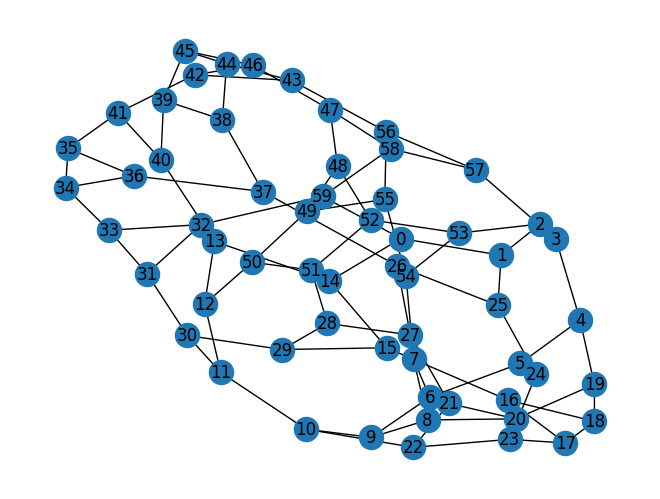

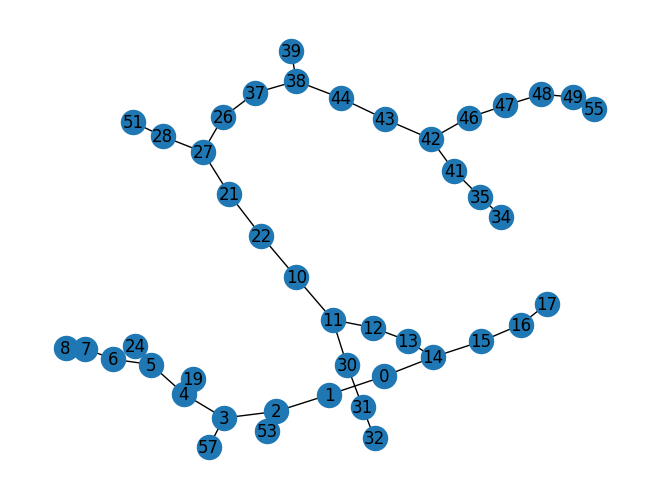

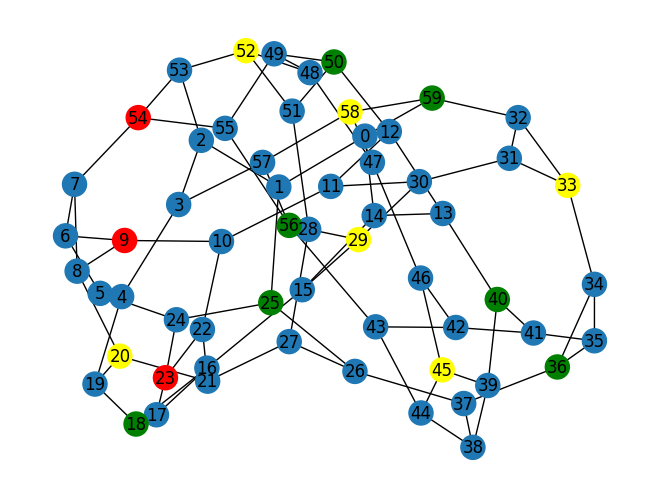

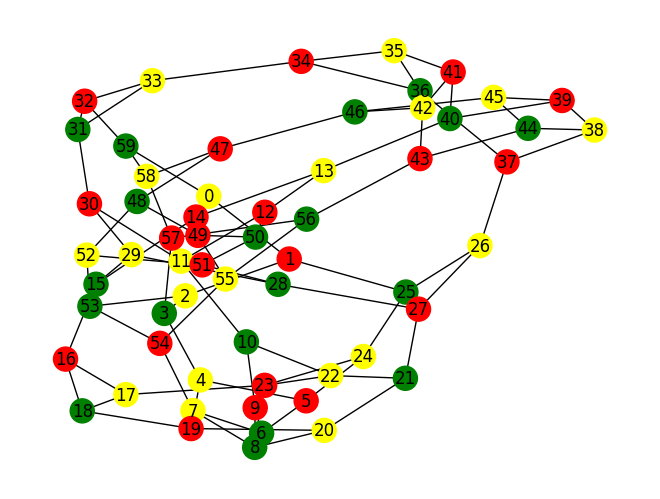

{9: 0, 18: 1, 20: 2, 23: 0, 25: 1, 29: 2, 33: 2, 36: 1, 40: 1, 45: 2, 50: 1, 52: 2, 54: 0, 56: 1, 58: 2, 59: 1, 8: 1, 7: 2, 6: 1, 17: 2, 16: 0, 15: 1, 19: 0, 24: 2, 5: 0, 32: 0, 31: 1, 30: 0, 34: 0, 35: 2, 39: 0, 41: 0, 51: 0, 28: 1, 53: 1, 55: 2, 49: 0, 48: 1, 47: 0, 46: 1, 42: 2, 43: 0, 44: 1, 38: 2, 37: 0, 26: 2, 27: 0, 21: 1, 22: 2, 10: 1, 11: 2, 12: 0, 13: 2, 14: 0, 0: 2, 1: 0, 2: 2, 57: 0, 3: 1, 4: 2} 0


In [1]:
import networkx as nx
from generate_asymp_3_reg_graph import create_random_3_reg_graph
from decycle_3_reg_graph import decycling_algorithm_3_reg_graph
from find_sudoku_coloring_3_reg_graph import find_coloring_3_reg_graph
from matplotlib import pyplot as plt

n = 60

# Generate a random 3-regular graph with n vertices by assuming that there is a hamilton cycle 1,2,3,...,n and randomly matching the nodes afterwards
G = create_random_3_reg_graph(n)
print(G)

# Decycle the graph G using Wormald's algorithm. The graph H is the resulting tree.
H = decycling_algorithm_3_reg_graph(G)
print(H)

best_coloring, best_sudoku_coloring, best_coloring_uncolored = find_coloring_3_reg_graph(G,H)
node_colors = []
for node in G.nodes():
    if node not in best_coloring:
        node_colors.append('#1f78b4')
    else:
        if best_coloring[node] == 0:
            node_colors.append('red')
        elif best_coloring[node] == 1:
            node_colors.append('green')
        else:
            node_colors.append('yellow')
        #node_colors.append(best_coloring[node])

sudoku_colors = []
for node in G.nodes():
    if node not in best_sudoku_coloring:
        sudoku_colors.append('#1f78b4')
    else:
        #sudoku_colors.append(best_sudoku_coloring[node])
        if best_sudoku_coloring[node] == 0:
            sudoku_colors.append('red')
        elif best_sudoku_coloring[node] == 1:
            sudoku_colors.append('green')
        else:
            sudoku_colors.append('yellow')

nx.draw(G, with_labels=True)
plt.show()

nx.draw(H, with_labels=True)
plt.show()

nx.draw(G, with_labels=True, node_color=sudoku_colors)
plt.show()

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

print(best_coloring, best_coloring_uncolored)